# Performing Linear Regression in TensorFlow

I gathered this data for current listing prices in North Bergen from [Zillow](http://www.zillow.com). Let's see if we can use it to develop a model for housing costs in the area.

In [127]:
%matplotlib inline
#Typical imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

# plots on fleek
matplotlib.style.use('ggplot')

In [101]:
# Read in the housing data from the csv file
# (df is short for dataframe)

df = pd.read_csv('nb home sales.csv', names=['Square Feet', 'Price'],dtype=np.float32)


In [68]:
df

,Square Feet,Price
0,670.0,144900.0
1,2760.0,508000.0
2,2860.0,600000.0
3,503.0,139000.0
4,1575.0,435000.0
5,935.0,260000.0
6,680.0,229000.0
7,1593.0,559000.0
8,2552.0,475000.0
9,1008.0,275000.0


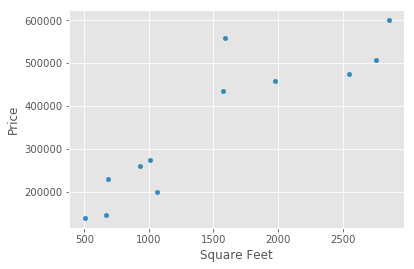

In [69]:
df.plot(x='Square Feet', y='Price', kind='scatter')

It seems a linear model could be appropriate in this case. How can we build it with TensorFlow?

In [108]:
# First we declare our placeholders
x = tf.placeholder(tf.float32, [None, 1]) 
y_ = tf.placeholder(tf.float32, [None, 1]) 

# Then our variables
W = tf.Variable(tf.zeros([1,1]))
b = tf.Variable(tf.zeros([1]))

# And now we can make our linear model: y = Wx + b
y = tf.matmul(x, W) + b

# Finally we choose our cost function (squared error in this case)
cost = tf.reduce_sum(tf.square(y_-y))

And here's where all the magic will happen:

In [140]:
train = tf.train.GradientDescentOptimizer(.0000000001).minimize(cost)
init = tf.global_variables_initializer()

xdata = np.asarray([[i] for i in df['Square Feet']])
y_data = np.asarray([[i] for i in df['Price']])

with tf.Session() as sess:
    sess.run(init)
    for i in range(25000):
        sess.run(train, feed_dict={x:xdata, y_:y_data})
    w = np.asscalar(sess.run(W))
    b = np.asscalar(sess.run(b))
    
        

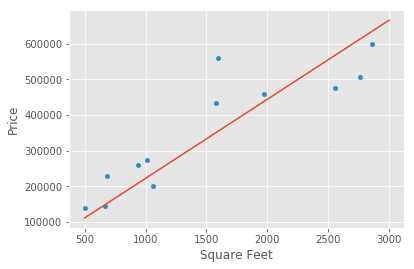

In [151]:
fig, axes = plt.subplots()
df.plot(x='Square Feet', y='Price', kind='scatter', ax=axes)
sqft = np.arange(500, 3000, 1)
plt.plot(sqft, w*sqft + b)
plt.show()
